In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dense,Flatten,Dropout, MaxPooling2D,BatchNormalization,LeakyReLU
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
import random as rn

import os




Using TensorFlow backend.


In [2]:
# Load the data
train = pd.read_csv("./digit-recognizer/train.csv")
test = pd.read_csv("./digit-recognizer/test.csv")

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

#g = sns.countplot(Y_train)

Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [4]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [5]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

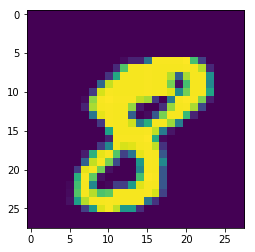

In [6]:
# Some examples
g = plt.imshow(X_train[10][:,:,0])

In [7]:
def CNNModel(model_num=None):#input dim: 28x28x1
    model = Sequential()
    model.add(Conv2D(32,(5,5),activation="relu",padding='SAME',input_shape=(28,28,1)))#output dim: 28*28*32
    model.add(Conv2D(32,(5,5),activation="relu"))#output dim: 24x24x32
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))#output dim: 14x14x32
    model.add(Conv2D(64,(5,5),activation="relu"))#10*10*64
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))#5*5*64
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(500,activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [41]:
digitRecon = CNNModel()

In [42]:
earlyStopping = EarlyStopping(monitor='acc',
                              patience=4)

In [43]:

digitRecon.compile(optimizer='adam',loss="categorical_crossentropy", metrics=["accuracy"])

In [44]:
digitRecon.fit(X_train,Y_train, epochs = 10, batch_size=256,callbacks=[earlyStopping])

Epoch 1/10
42000/42000 [==============================] - 6s 134us/step - loss: 0.2269 - acc: 0.9317
Epoch 2/10
42000/42000 [==============================] - 4s 105us/step - loss: 0.0640 - acc: 0.9793
Epoch 3/10
42000/42000 [==============================] - 4s 104us/step - loss: 0.0433 - acc: 0.9865
Epoch 4/10
42000/42000 [==============================] - 4s 105us/step - loss: 0.0358 - acc: 0.9889
Epoch 5/10
42000/42000 [==============================] - 4s 106us/step - loss: 0.0325 - acc: 0.9892
Epoch 6/10
42000/42000 [==============================] - 4s 103us/step - loss: 0.0227 - acc: 0.9921
Epoch 7/10
42000/42000 [==============================] - 4s 100us/step - loss: 0.0236 - acc: 0.9922
Epoch 8/10
42000/42000 [==============================] - 4s 100us/step - loss: 0.0213 - acc: 0.9929
Epoch 9/10
42000/42000 [==============================] - 4s 100us/step - loss: 0.0227 - acc: 0.9930
Epoch 10/10
42000/42000 [==============================] - 4s 102us/step - loss: 0.0181 - a

In [45]:
# predict results
results = digitRecon.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

Text(0.5, 1.0, 'Predicted value:2')

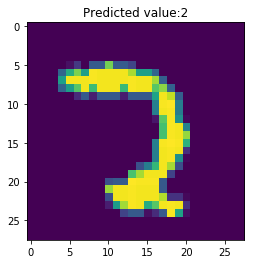

In [53]:
#results.head(2)
val=rn.randint(0,test.shape[0]-1)
plt.imshow(test[val][:,:,0])
plt.title("Predicted value:"+str(results[val]))

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)